# Week 2 of IBM Advance Data Science Capstone Project

### For this section, I will inspect the dataset for missing values and perform feature engineering by addiing additional independent variables as well as encoding existing the categorical variables before developing the prediction model in Week 3



In [0]:
#Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
#Import statistical libraries
from scipy import stats
from scipy.stats import skew, norm

In [3]:
!wget https://raw.githubusercontent.com/aziz0519/Advanced-Data-Science-Capstone-Project/master/listings.csv

--2020-03-24 05:11:20--  https://raw.githubusercontent.com/aziz0519/Advanced-Data-Science-Capstone-Project/master/listings.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1188761 (1.1M) [text/plain]
Saving to: ‘listings.csv.1’

listings.csv.1      100%[===================>]   1.13M  --.-KB/s    in 0.06s   

2020-03-24 05:11:21 (18.1 MB/s) - ‘listings.csv.1’ saved [1188761/1188761]



In [4]:
df_listings = pd.read_csv('listings.csv')
df_listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,84,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,80,90,18,2014-12-26,0.25,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,70,6,20,2015-10-01,0.19,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,207,1,20,2020-01-17,0.20,8,365
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,95,1,24,2019-10-13,0.23,8,365


In [5]:
#Recall the descriptive statistics of the dataset
df_listings.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,8.047000e+03,8.047000e+03,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000,5120.000000,8047.00000,8047.000000
mean,2.622832e+07,1.025438e+08,1.313418,103.848927,170.213371,18.592767,13.762147,0.973230,46.04859,220.874115
std,1.176525e+07,9.286072e+07,0.030409,0.041647,320.329233,45.051991,32.691906,1.333166,76.35387,147.731172
min,4.909100e+04,2.366600e+04,1.243870,103.646560,0.000000,1.000000,0.000000,0.010000,1.00000,0.000000
25%,1.686457e+07,2.372262e+07,1.296025,103.838185,66.000000,1.000000,0.000000,0.150000,2.00000,75.000000
50%,2.811631e+07,6.640618e+07,1.311000,103.850310,126.000000,3.000000,1.000000,0.460000,11.00000,297.000000
75%,3.672920e+07,1.682577e+08,1.321465,103.867417,199.000000,14.000000,10.000000,1.200000,53.00000,363.000000
max,4.257871e+07,3.384378e+08,1.454590,103.973420,10000.000000,1000.000000,366.000000,24.490000,340.00000,365.000000


In [6]:
#Inspect the variable types
df_listings.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [7]:
#Inspect for missing values
df_listings.isnull().any()

id                                False
name                               True
host_id                           False
host_name                         False
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
dtype: bool

/usr/local/lib/python3.6/dist-packages/seaborn/utils.py:287: UserWarning: Use the colorbar set_ticks() method instead.
  ax_i.set_yticks(newticks)


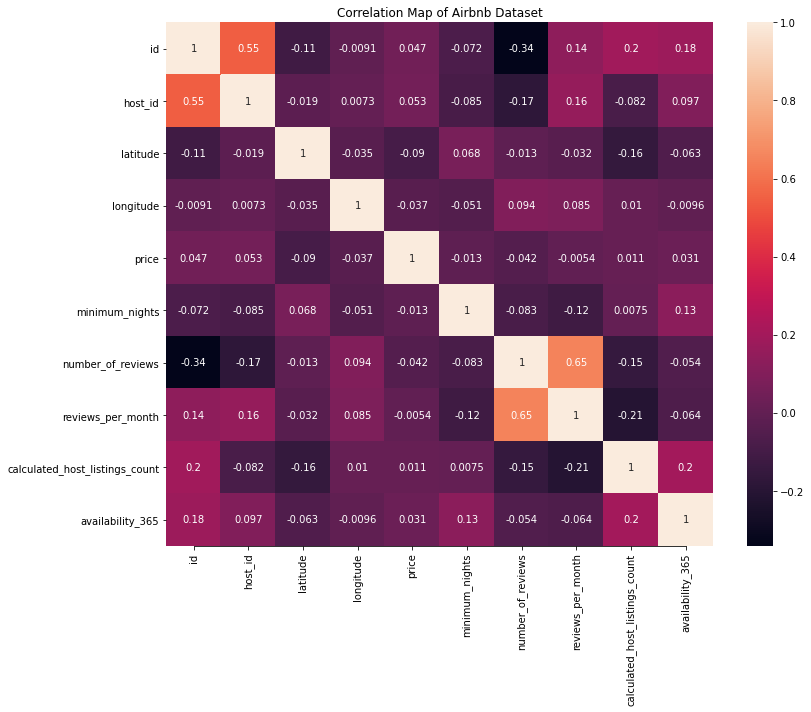

In [8]:
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(df_listings.corr(), annot=True)
ax.set(title='Correlation Map of Airbnb Dataset')
ax.xaxis.grid(False)
sns.despine(left=True,trim=True)
plt.tight_layout()
plt.show()

### Since number of reviews and reviews per month have a strong correlation with each other, we can choose to drop one of them. For this case, we will drop the review per month as there are missing values

In [0]:
#Drop the columns which are not required for the analysis and predictive model
df_listings.drop(['id','name','host_id','host_name','last_review','reviews_per_month'],axis=1,inplace=True)

In [10]:
df_listings.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,North Region,Woodlands,1.44255,103.79580,Private room,84,180,1,2,365
1,Central Region,Bukit Timah,1.33235,103.78521,Private room,80,90,18,1,365
2,North Region,Woodlands,1.44246,103.79667,Private room,70,6,20,2,365
3,East Region,Tampines,1.34541,103.95712,Private room,207,1,20,8,365
4,East Region,Tampines,1.34567,103.95963,Private room,95,1,24,8,365


### Feature engineering: I will create a new feature to calculate the distance from each Airbnb property to the nearest MRT/LRT station. Credits given to Hui Xiang Chua for the dataset on Github repo. 

In [11]:
!wget https://raw.githubusercontent.com/hxchua/datadoubleconfirm/master/datasets/mrtsg.csv 

--2020-03-24 05:12:29--  https://raw.githubusercontent.com/hxchua/datadoubleconfirm/master/datasets/mrtsg.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15533 (15K) [text/plain]
Saving to: ‘mrtsg.csv.1’

mrtsg.csv.1         100%[===================>]  15.17K  --.-KB/s    in 0.007s  

2020-03-24 05:12:29 (2.13 MB/s) - ‘mrtsg.csv.1’ saved [15533/15533]



In [12]:
mrt_data = pd.read_csv('mrtsg.csv')
mrt_data.head()

,OBJECTID,STN_NAME,STN_NO,X,Y,Latitude,Longitude,COLOR
0,12,ADMIRALTY MRT STATION,NS10,24402.1063,46918.1131,1.440585,103.800998,RED
1,16,ALJUNIED MRT STATION,EW9,33518.6049,33190.0020,1.316433,103.882893,GREEN
2,33,ANG MO KIO MRT STATION,NS16,29807.2655,39105.7720,1.369933,103.849553,RED
3,81,BAKAU LRT STATION,SE3,36026.0821,41113.8766,1.388093,103.905418,OTHERS
4,80,BANGKIT LRT STATION,BP9,21248.2460,40220.9693,1.380018,103.772667,OTHERS


In [0]:
#Import geopy distance calculator
from geopy.distance import geodesic

In [0]:
def nearest_distance(nb_row, mrt_lrt):
  nb_lat , nb_long = nb_row[['latitude','longitude']]
  min_distance = 9999.00
  for stn_lat , stn_lng in zip(mrt_data['Latitude'],mrt_data['Longitude']):
    distance = geodesic((nb_lat,nb_long),(stn_lat,stn_lng)).km
    if distance < min_distance:
      min_distance = distance 
  return min_distance

In [15]:
%%time
df_listings['distance_to_nearest_stn'] = df_listings.apply(nearest_distance, axis=1,mrt_lrt = mrt_data)

CPU times: user 4min 50s, sys: 44.7 ms, total: 4min 50s
Wall time: 4min 50s


In [16]:
df_listings.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,distance_to_nearest_stn
0,North Region,Woodlands,1.44255,103.79580,Private room,84,180,1,2,365,0.617939
1,Central Region,Bukit Timah,1.33235,103.78521,Private room,80,90,18,1,365,0.397868
2,North Region,Woodlands,1.44246,103.79667,Private room,70,6,20,2,365,0.524388
3,East Region,Tampines,1.34541,103.95712,Private room,207,1,20,8,365,0.486465
4,East Region,Tampines,1.34567,103.95963,Private room,95,1,24,8,365,0.479073


/usr/local/lib/python3.6/dist-packages/seaborn/utils.py:287: UserWarning: Use the colorbar set_ticks() method instead.
  ax_i.set_yticks(newticks)


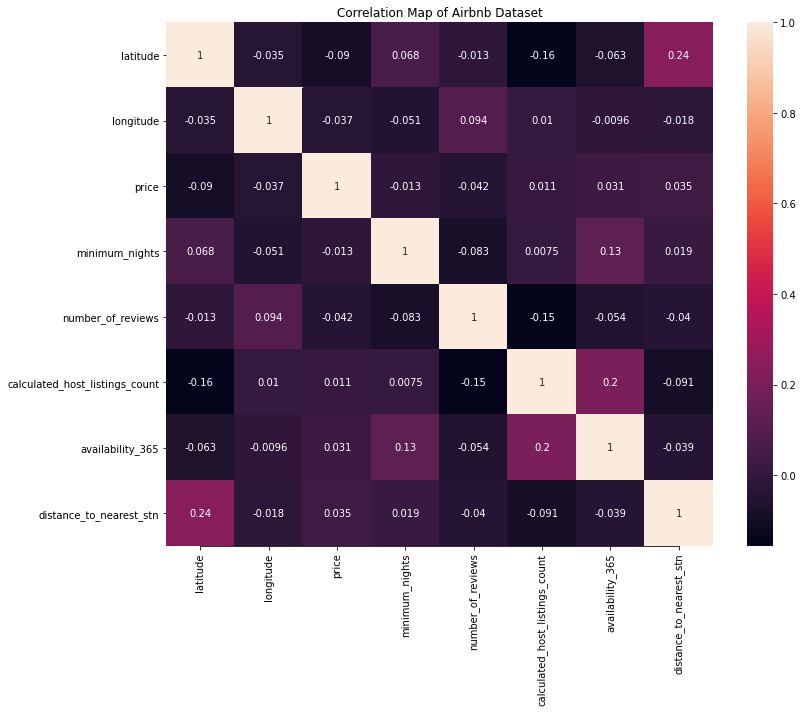

In [17]:
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(df_listings.corr(), annot=True)
ax.set(title='Correlation Map of Airbnb Dataset')
ax.xaxis.grid(False)
sns.despine(left=True,trim=True)
plt.tight_layout()
plt.show()

In [18]:
df_listings.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,distance_to_nearest_stn
count,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000,8047.00000,8047.000000,8047.000000
mean,1.313418,103.848927,170.213371,18.592767,13.762147,46.04859,220.874115,0.524526
std,0.030409,0.041647,320.329233,45.051991,32.691906,76.35387,147.731172,0.386795
min,1.243870,103.646560,0.000000,1.000000,0.000000,1.00000,0.000000,0.004443
25%,1.296025,103.838185,66.000000,1.000000,0.000000,2.00000,75.000000,0.266943
50%,1.311000,103.850310,126.000000,3.000000,1.000000,11.00000,297.000000,0.436837
75%,1.321465,103.867417,199.000000,14.000000,10.000000,53.00000,363.000000,0.661399
max,1.454590,103.973420,10000.000000,1000.000000,366.000000,340.00000,365.000000,7.932300


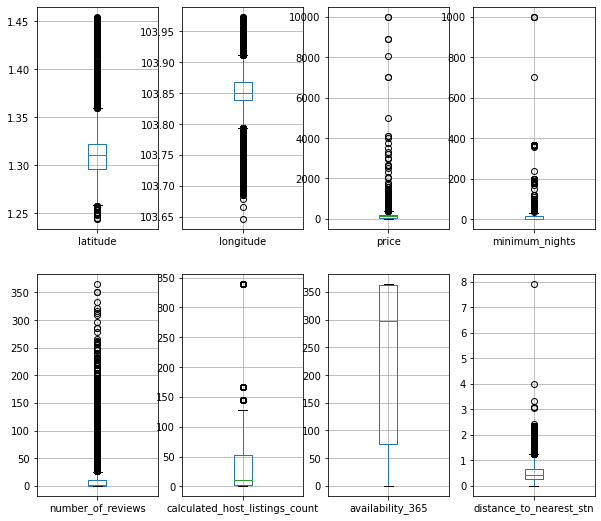

In [19]:
cols=['latitude','longitude','price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365','distance_to_nearest_stn']
plt.figure(figsize=(10,9))
for i in range(1,9):
    
    plt.subplot(2,4,i)
    fig=df_listings.boxplot(column=cols[i-1])

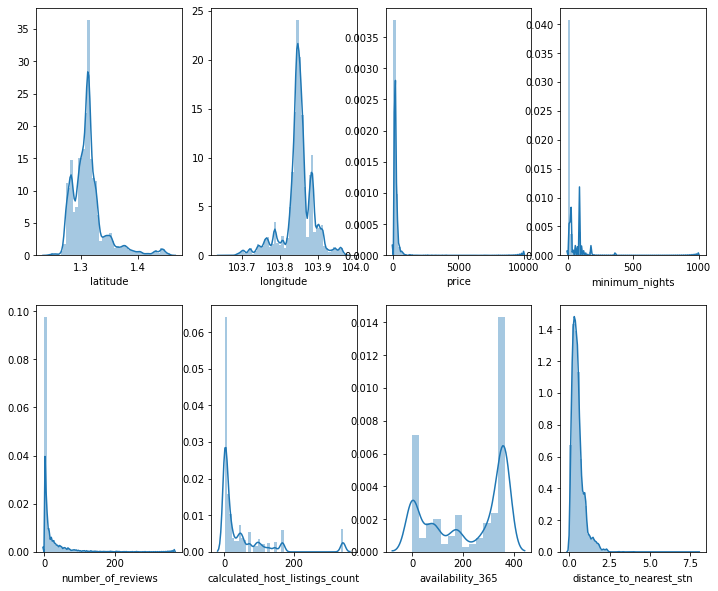

In [20]:
plt.figure(figsize=(12,10))
for j in range(1,9):
    plt.subplot(2,4,j)
    sns.distplot(df_listings[cols[j-1]])

In [22]:
#Identify the number of properties which do not have any reviews
df_listings[df_listings.number_of_reviews == 0]

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,distance_to_nearest_stn
18,Central Region,Geylang,1.314200,103.902320,Private room,80,90,0,1,174,0.625220
24,East Region,Tampines,1.348160,103.932380,Private room,38,180,0,1,365,0.731819
27,Central Region,Rochor,1.301090,103.852340,Private room,168,180,0,1,365,0.312655
29,Central Region,Queenstown,1.309010,103.796390,Shared room,210,1,0,1,0,0.313054
30,North-East Region,Serangoon,1.367430,103.872880,Private room,27,180,0,1,365,1.573927
...,...,...,...,...,...,...,...,...,...,...,...
8042,Central Region,Rochor,1.312086,103.854106,Entire home/apt,187,3,0,26,365,0.031190
8043,Central Region,Rochor,1.312086,103.854106,Entire home/apt,185,7,0,26,365,0.031190
8044,Central Region,Rochor,1.312086,103.854106,Entire home/apt,178,28,0,26,365,0.031190
8045,Central Region,Toa Payoh,1.330277,103.867404,Entire home/apt,150,7,0,26,365,0.219656


### More than 30% of the properties do not have any reviews

In [23]:
#Filter out data by which minimum nights is more than 365 days
df_listings = df_listings[df_listings.minimum_nights <= 365]
df_listings.shape

(8042, 11)

In [24]:
df_listings[df_listings.availability_365 == 0]

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,distance_to_nearest_stn
29,Central Region,Queenstown,1.30901,103.79639,Shared room,210,1,0,1,0,0.313054
32,Central Region,Downtown Core,1.27663,103.84521,Private room,900,4,72,4,0,0.073453
33,Central Region,Downtown Core,1.27585,103.84597,Private room,149,4,26,4,0,0.075206
35,North-East Region,Serangoon,1.35001,103.87161,Private room,43,1,36,1,0,0.105370
36,East Region,Pasir Ris,1.37527,103.94562,Private room,206,1,0,1,0,0.475120
...,...,...,...,...,...,...,...,...,...,...,...
7510,West Region,Jurong East,1.33442,103.74171,Entire home/apt,161,21,0,340,0,0.155293
7520,East Region,Bedok,1.31946,103.91391,Entire home/apt,171,3,0,2,0,0.205898
7557,Central Region,Kallang,1.32688,103.86694,Entire home/apt,148,3,0,28,0,0.549975
7635,Central Region,Bukit Merah,1.27158,103.82727,Private room,55,1,0,1,0,0.936044


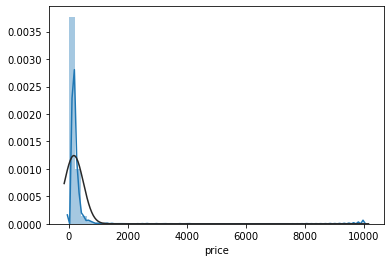

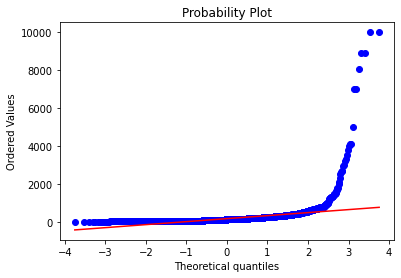

In [25]:
sns.distplot(df_listings['price'],fit=norm)
fig = plt.figure()
res = stats.probplot(df_listings['price'],plot=plt)

In [26]:
df_listings = df_listings[df_listings.price > 0]
df_listings.shape

(8041, 11)

In [0]:
df_listings['price'] = np.log(df_listings['price'])

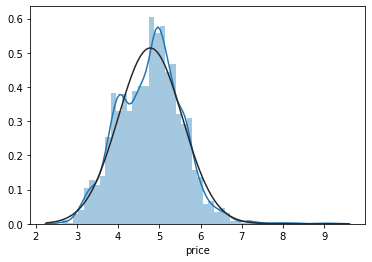

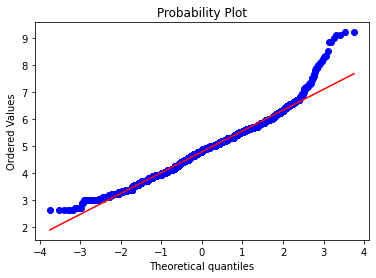

In [28]:
sns.distplot(df_listings['price'],fit=norm)
fig = plt.figure()
res = stats.probplot(df_listings['price'],plot=plt)

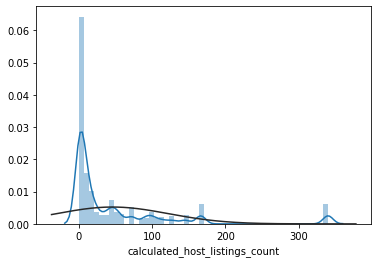

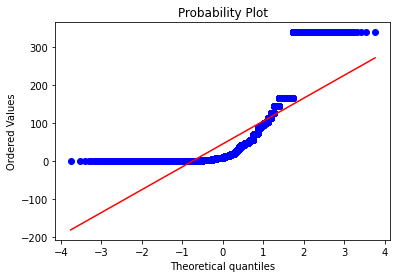

In [29]:
sns.distplot(df_listings['calculated_host_listings_count'],fit=norm)
fig = plt.figure()
res = stats.probplot(df_listings['calculated_host_listings_count'],plot=plt)

In [0]:
df_listings['calculated_host_listings_count'] = np.log(df_listings['calculated_host_listings_count'])

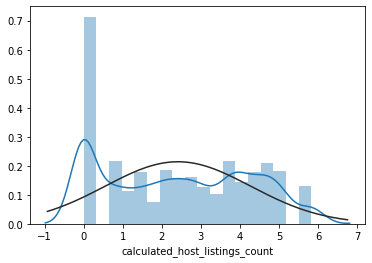

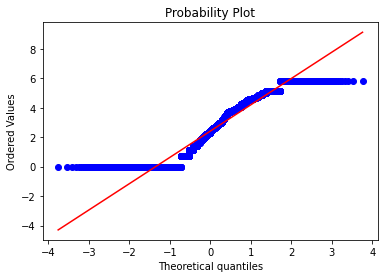

In [31]:
sns.distplot(df_listings['calculated_host_listings_count'],fit=norm)
fig = plt.figure()
res = stats.probplot(df_listings['calculated_host_listings_count'],plot=plt)

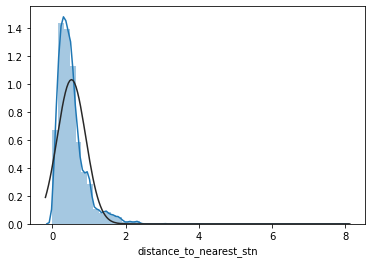

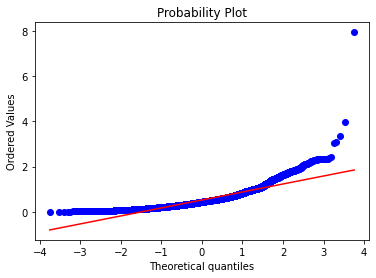

In [32]:
sns.distplot(df_listings['distance_to_nearest_stn'],fit=norm)
fig = plt.figure()
res = stats.probplot(df_listings['distance_to_nearest_stn'],plot=plt)

In [0]:
df_listings['distance_to_nearest_stn'] = np.log(df_listings['distance_to_nearest_stn'])

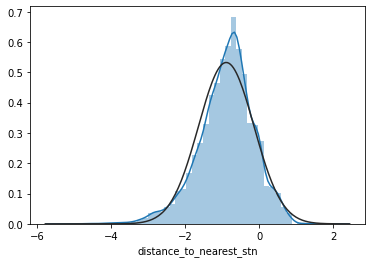

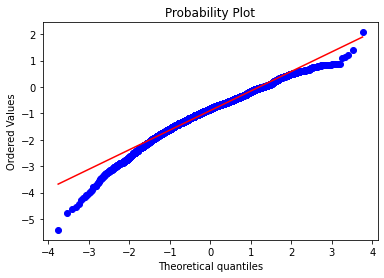

In [34]:
sns.distplot(df_listings['distance_to_nearest_stn'],fit=norm)
fig = plt.figure()
res = stats.probplot(df_listings['distance_to_nearest_stn'],plot=plt)

In [35]:
#for latitude
std=np.std(df_listings['latitude'])
mean=np.mean(df_listings['latitude'])
median=np.median(df_listings['latitude'])
outliers=[]
for x in df_listings['latitude']:
    zscore=(x-mean)/std
    if zscore>abs(3):
        outliers.append(x)

len(outliers)

194

In [0]:
df_listings = df_listings.replace(outliers, median)

In [37]:
#for longitude
std=np.std(df_listings['longitude'])
mean=np.mean(df_listings['longitude'])
median=np.median(df_listings['longitude'])
outliers=[]
for x in df_listings['longitude']:
    zscore=(x-mean)/std
    if -3<zscore>3:
        outliers.append(x)

len(outliers)

0

### Encoding of the categorical variables

In [38]:
#Inspect the variables for room_type
df_listings['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

In [0]:
room_type_map = {'Private room' : 1, 'Entire home/apt': 2 , 'Shared room':3 ,'Hotel room' : 4}
df_listings['room_type'] = df_listings['room_type'].map(room_type_map)

In [40]:
df_listings.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,distance_to_nearest_stn
0,North Region,Woodlands,1.31100,103.79580,1,4.430817,180,1,0.693147,365,-0.481366
1,Central Region,Bukit Timah,1.33235,103.78521,1,4.382027,90,18,0.000000,365,-0.921634
2,North Region,Woodlands,1.31100,103.79667,1,4.248495,6,20,0.693147,365,-0.645523
3,East Region,Tampines,1.34541,103.95712,1,5.332719,1,20,2.079442,365,-0.720591
4,East Region,Tampines,1.34567,103.95963,1,4.553877,1,24,2.079442,365,-0.735902


In [41]:
df_listings['neighbourhood'].unique()

array(['Woodlands', 'Bukit Timah', 'Tampines', 'Bedok', 'Bukit Merah',
       'Newton', 'Geylang', 'River Valley', 'Serangoon', 'Jurong West',
       'Rochor', 'Queenstown', 'Downtown Core', 'Marine Parade',
       'Pasir Ris', 'Toa Payoh', 'Outram', 'Punggol', 'Tanglin',
       'Hougang', 'Kallang', 'Novena', 'Bukit Panjang', 'Mandai',
       'Orchard', 'Ang Mo Kio', 'Bukit Batok', 'Museum', 'Sembawang',
       'Choa Chu Kang', 'Singapore River', 'Jurong East', 'Clementi',
       'Sengkang', 'Bishan', 'Central Water Catchment', 'Yishun',
       'Southern Islands', 'Sungei Kadut', 'Western Water Catchment',
       'Tuas', 'Pioneer', 'Marina South', 'Lim Chu Kang'], dtype=object)

In [42]:
len(df_listings['neighbourhood'].unique())

44

In [43]:
df_listings['neighbourhood_group'].unique()

array(['North Region', 'Central Region', 'East Region',
       'North-East Region', 'West Region'], dtype=object)

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
le = LabelEncoder()
df_listings['neighbourhood'] = le.fit_transform(df_listings['neighbourhood'])

In [0]:
le = LabelEncoder()
df_listings['neighbourhood_group'] = le.fit_transform(df_listings['neighbourhood_group'])

In [47]:
df_listings.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,distance_to_nearest_stn
0,2,42,1.31100,103.79580,1,4.430817,180,1,0.693147,365,-0.481366
1,0,6,1.33235,103.78521,1,4.382027,90,18,0.000000,365,-0.921634
2,2,42,1.31100,103.79667,1,4.248495,6,20,0.693147,365,-0.645523
3,1,37,1.34541,103.95712,1,5.332719,1,20,2.079442,365,-0.720591
4,1,37,1.34567,103.95963,1,4.553877,1,24,2.079442,365,-0.735902


In [0]:
listing_model = df_listings.to_csv('listing_model.csv')
from google.colab import files
files.download('listing_model.csv')